http://saocompute.eurac.edu/rasdaman/ows

In [2]:
from wcps_rasdaman import *
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

# Forest

X,Y (4422545.78041;2603430.96908) EPSG 3035


E,N (678085.052828;5156230.02423) EPSG 32632

![title](forest.PNG)

## Calculate NDVI of one pixel of S2A data for urban/forest for a timeseries

Timeseries:   
"2016-09-19T15:52:27.000Z" to "2016-11-18T17:36:54.000Z"

In [4]:
ndvi_forest = wcps_rasdaman('''
for b4 in (s2a_l2a_t32tps_B04_10m), b8 in (s2a_l2a_t32tps_B08_10m) 
return encode(
(b8[E(678085.052828), N(5156230.02423)] - b4 [E(678085.052828), N(5156230.02423)])
/
(b8[E(678085.052828), N(5156230.02423)] + b4[E(678085.052828), N(5156230.02423)])
,"csv")
''', '10.7.18.68')

This is the URL, used for the request 
http://10.7.18.68:8080/rasdaman/ows?SERVICE=WCS&VERSION=2.0.1&REQUEST=ProcessCoverages&QUERY=%250Afor%2520b4%2520in%2520%28s2a_l2a_t32tps_B04_10m%29%2C%2520b8%2520in%2520%28s2a_l2a_t32tps_B08_10m%29%2520%250Areturn%2520encode%28%250A%28b8%255BE%28678085.052828%29%2C%2520N%285156230.02423%29%255D%2520-%2520b4%2520%255BE%28678085.052828%29%2C%2520N%285156230.02423%29%255D%29%250A%2F%250A%28b8%255BE%28678085.052828%29%2C%2520N%285156230.02423%29%255D%2520%2B%2520b4%255BE%28678085.052828%29%2C%2520N%285156230.02423%29%255D%29%250A%2C%2522csv%2522%29%250A


### Calculate the NDVI in Python with the seperate bands

In [5]:
b04_forest = wcps_rasdaman('''
for b4 in (s2a_l2a_t32tps_B04_10m)
return encode(
b4[E(678085.052828), N(5156230.02423)],"csv")''', '10.7.18.68')

b08_forest = wcps_rasdaman('''
for b8 in (s2a_l2a_t32tps_B08_10m)
return encode(
b8[E(678085.052828), N(5156230.02423)],"csv")''', '10.7.18.68')

This is the URL, used for the request 
http://10.7.18.68:8080/rasdaman/ows?SERVICE=WCS&VERSION=2.0.1&REQUEST=ProcessCoverages&QUERY=%250Afor%2520b4%2520in%2520%28s2a_l2a_t32tps_B04_10m%29%250Areturn%2520encode%28%250Ab4%255BE%28678085.052828%29%2C%2520N%285156230.02423%29%255D%2C%2522csv%2522%29
This is the URL, used for the request 
http://10.7.18.68:8080/rasdaman/ows?SERVICE=WCS&VERSION=2.0.1&REQUEST=ProcessCoverages&QUERY=%250Afor%2520b8%2520in%2520%28s2a_l2a_t32tps_B08_10m%29%250Areturn%2520encode%28%250Ab8%255BE%28678085.052828%29%2C%2520N%285156230.02423%29%255D%2C%2522csv%2522%29


In [6]:
a = b08_forest - b04_forest
b = b08_forest + b04_forest

ndvi_forest_python = a/b

### Compare NDVI from Python & Rasdaman

In [7]:
ndvi_forest_python == ndvi_forest

array([False, False, False, False, False, False, False, False, False, False], dtype=bool)

In [11]:
ndvi_forest_python

array([ 0.1555401 ,  0.02490807,  0.80752533,  0.01945964, -0.00232666,
       -0.00163361,  0.81678657,  0.12435101,  0.68053447, -0.00096656])

In [12]:
ndvi_forest

array([  1.55540000e-01,   2.49080000e-02,   8.07525000e-01,
         1.94600000e-02,   3.04955790e+01,   3.05881000e+00,
         8.16787000e-01,   1.24351000e-01,   6.80534000e-01,
         1.26686640e+01])

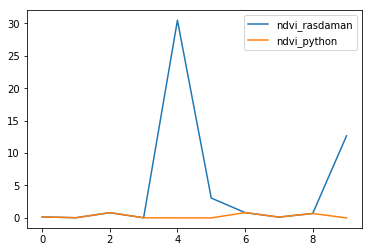

In [8]:
plt.plot(ndvi_forest, label = 'ndvi_rasdaman')
plt.plot(ndvi_forest_python, label = 'ndvi_python')
plt.legend()

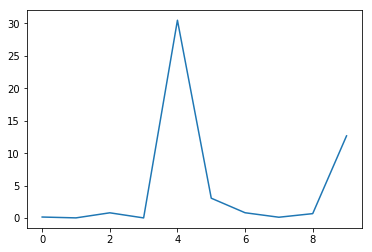

In [9]:
plt.plot(ndvi_forest, label = 'ndvi_rasdaman')

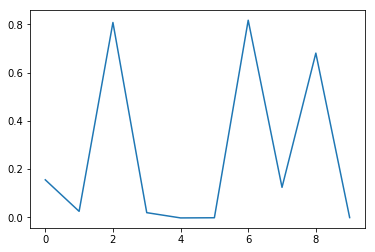

In [10]:
plt.plot(ndvi_forest_python, label = 'ndvi_python')

# Test Rasdaman behaviour

**Add B04 to B08 -> this seems to work perfectly**

In [14]:
add_b4_b8 = wcps_rasdaman('''
for b4 in (s2a_l2a_t32tps_B04_10m), b8 in (s2a_l2a_t32tps_B08_10m) 
return encode(
b8[E(678085.052828), N(5156230.02423)] + b4[E(678085.052828), N(5156230.02423)]
,"csv")
''', '10.7.18.68')

This is the URL, used for the request 
http://10.7.18.68:8080/rasdaman/ows?SERVICE=WCS&VERSION=2.0.1&REQUEST=ProcessCoverages&QUERY=%250Afor%2520b4%2520in%2520%28s2a_l2a_t32tps_B04_10m%29%2C%2520b8%2520in%2520%28s2a_l2a_t32tps_B08_10m%29%2520%250Areturn%2520encode%28%250Ab8%255BE%28678085.052828%29%2C%2520N%285156230.02423%29%255D%2520%2B%2520b4%255BE%28678085.052828%29%2C%2520N%285156230.02423%29%255D%250A%2C%2522csv%2522%29%250A


In [18]:
b08_forest + b04_forest == add_b4_b8

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

**Subtract B04 from B08 -> same values are off**

In [16]:
subtract_b4_b8 = wcps_rasdaman('''
for b4 in (s2a_l2a_t32tps_B04_10m), b8 in (s2a_l2a_t32tps_B08_10m) 
return encode(
b8[E(678085.052828), N(5156230.02423)] - b4[E(678085.052828), N(5156230.02423)]
,"csv")
''', '10.7.18.68')

This is the URL, used for the request 
http://10.7.18.68:8080/rasdaman/ows?SERVICE=WCS&VERSION=2.0.1&REQUEST=ProcessCoverages&QUERY=%250Afor%2520b4%2520in%2520%28s2a_l2a_t32tps_B04_10m%29%2C%2520b8%2520in%2520%28s2a_l2a_t32tps_B08_10m%29%2520%250Areturn%2520encode%28%250Ab8%255BE%28678085.052828%29%2C%2520N%285156230.02423%29%255D%2520-%2520b4%255BE%28678085.052828%29%2C%2520N%285156230.02423%29%255D%250A%2C%2522csv%2522%29%250A


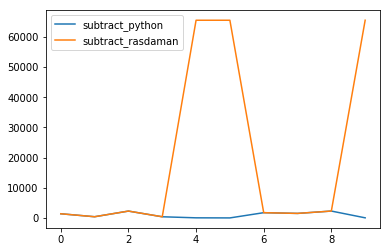

In [22]:
plt.plot(b08_forest - b04_forest, label = 'subtract_python')
plt.plot(subtract_b4_b8, label = 'subtract_rasdaman')
plt.legend()

In [17]:
b08_forest - b04_forest == subtract_b4_b8

array([ True,  True,  True,  True, False, False,  True,  True,  True, False], dtype=bool)

In [23]:
subtract_b4_b8

array([  1342.,    359.,   2232.,    345.,  65535.,  65535.,   1703.,
         1461.,   2241.,  65535.])

In [24]:
b08_forest - b04_forest

array([ 1342.,   359.,  2232.,   345.,    -5.,   -35.,  1703.,  1461.,
        2241.,    -5.])

### If the return value of the subtraction is negative, Rasdaman returns a wrong value -> as can be seen with item 5,6 & 10 in the pixel history

In [25]:
b08_forest

array([  4985.,   7386.,   2498.,   9037.,   1072.,  10695.,   1894.,
         6605.,   2767.,   2584.])

In [26]:
b04_forest

array([  3643.,   7027.,    266.,   8692.,   1077.,  10730.,    191.,
         5144.,    526.,   2589.])